### Why we're here?
In this notebook, we will make the first steps towards developing an algorithm that could be used as part of a mobile or web app. At the end of this project, our code will accept any user-supplied food image as input and it will output the name of the food item or "label" of the input image.


### Citation
```
@inproceedings{bossard14,

  title = {Food-101 -- Mining Discriminative Components with Random Forests},
  author = {Bossard, Lukas and Guillaumin, Matthieu and Van Gool, Luc},
  booktitle = {European Conference on Computer Vision},
  year = {2014}
}
```
### The Dataset
The dataset contains images of food, organized by type of food. This dataset consists of 101 food categories, with 101,000 images. For each class, 250 manually reviewed test images are provided as well as 750 training images. On purpose, the training images were not cleaned, and thus still contain some amount of noise. This comes mostly in the form of intense colors and sometimes wrong labels. All images were rescaled to have a maximum side length of 512 pixels.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai2.vision.all import *

In [19]:
path = "/home/shubham/foodai/data/food-101/images/"

In [21]:
foods = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                  splitter=RandomSplitter(valid_pct=0.2, seed=42),
                  get_y=parent_label,
                  item_tfms=Resize(460),
                  batch_tfms=aug_transforms(size=224, min_scale=0.75)
                )

In [22]:
dls = foods.dataloaders(path)

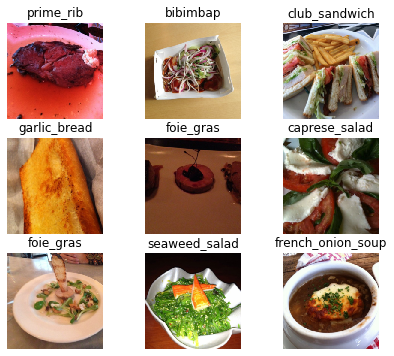

In [31]:
dls.show_batch(max_n=9, figsize=(7,6))

In [24]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

In [25]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [26]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,2.167974,1.730011,0.445644,04:43


epoch,train_loss,valid_loss,error_rate,time
0,1.323973,1.086584,0.285743,05:56


In [27]:
learn.export()

In [30]:
learn.predict('../data/food-101/images/apple_pie/101251.jpg')

('apple_pie',
 tensor(0),
 tensor([6.0203e-01, 1.3477e-05, 1.8502e-03, 9.8222e-06, 9.9093e-05, 4.6370e-07,
         4.5978e-05, 4.4889e-06, 1.9167e-04, 9.8968e-06, 1.4852e-06, 1.1399e-05,
         2.9714e-04, 2.5189e-06, 1.3269e-04, 1.6572e-05, 1.1774e-04, 2.8050e-04,
         6.6909e-04, 1.6745e-04, 4.7171e-06, 2.7480e-04, 1.2917e-04, 9.0861e-05,
         3.5733e-03, 1.1755e-05, 4.1755e-05, 7.5802e-04, 1.6272e-05, 9.3971e-04,
         3.2568e-04, 2.6455e-03, 3.7163e-03, 2.5555e-04, 2.2767e-05, 1.6219e-03,
         3.9559e-06, 2.3259e-05, 5.8553e-05, 2.2977e-04, 1.2474e-04, 1.1307e-03,
         6.7610e-05, 9.7474e-04, 1.4129e-04, 3.8258e-06, 1.9692e-03, 2.6603e-02,
         1.5250e-05, 8.0336e-05, 9.4939e-05, 2.8683e-04, 1.4973e-03, 3.5559e-05,
         2.6250e-04, 3.3882e-05, 4.7628e-04, 2.1359e-01, 2.2243e-04, 6.5545e-05,
         3.2782e-04, 4.9771e-06, 3.8290e-02, 2.6683e-05, 1.1155e-03, 3.2768e-05,
         1.0079e-04, 4.7627e-04, 6.4308e-04, 8.8869e-05, 4.5425e-05, 1.0942e-04,
  

In [32]:
??Resize